In [1]:
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

In [2]:
stock = yf.Ticker("MSFT")
stock = stock.history(period='2y')


In [3]:
stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-08-02 00:00:00-04:00,271.235857,273.093248,267.678348,270.076233,22754200,0.0,0.0
2022-08-03 00:00:00-04:00,271.982778,278.606427,271.835343,277.594208,23518900,0.0,0.0
2022-08-04 00:00:00-04:00,276.935772,278.901250,275.333934,278.753845,18098700,0.0,0.0
2022-08-05 00:00:00-04:00,274.331474,278.753798,273.869586,278.026581,16774600,0.0,0.0
2022-08-08 00:00:00-04:00,279.146919,280.984666,274.498585,275.481323,18739200,0.0,0.0
...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,418.200012,428.920013,417.269989,425.269989,23583800,0.0,0.0
2024-07-29 00:00:00-04:00,431.579987,432.149994,424.700012,426.730011,15125800,0.0,0.0
2024-07-30 00:00:00-04:00,427.720001,429.049988,417.359985,422.920013,32687600,0.0,0.0


In [4]:
del stock['Dividends']
del stock['Stock Splits']

In [5]:
stock

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-02 00:00:00-04:00,271.235857,273.093248,267.678348,270.076233,22754200
2022-08-03 00:00:00-04:00,271.982778,278.606427,271.835343,277.594208,23518900
2022-08-04 00:00:00-04:00,276.935772,278.901250,275.333934,278.753845,18098700
2022-08-05 00:00:00-04:00,274.331474,278.753798,273.869586,278.026581,16774600
2022-08-08 00:00:00-04:00,279.146919,280.984666,274.498585,275.481323,18739200
...,...,...,...,...,...
2024-07-26 00:00:00-04:00,418.200012,428.920013,417.269989,425.269989,23583800
2024-07-29 00:00:00-04:00,431.579987,432.149994,424.700012,426.730011,15125800
2024-07-30 00:00:00-04:00,427.720001,429.049988,417.359985,422.920013,32687600


<Axes: xlabel='Date'>

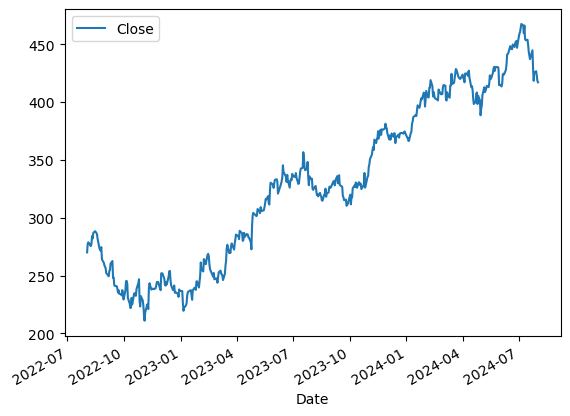

In [6]:
stock.plot.line(y="Close")

In [7]:
stock["Next Days Close"] = stock['Close'].shift(-1)

In [8]:
stock

,Open,High,Low,Close,Volume,Next Days Close
Date,,,,,,
2022-08-02 00:00:00-04:00,271.235857,273.093248,267.678348,270.076233,22754200,277.594208
2022-08-03 00:00:00-04:00,271.982778,278.606427,271.835343,277.594208,23518900,278.753845
2022-08-04 00:00:00-04:00,276.935772,278.901250,275.333934,278.753845,18098700,278.026581
2022-08-05 00:00:00-04:00,274.331474,278.753798,273.869586,278.026581,16774600,275.481323
2022-08-08 00:00:00-04:00,279.146919,280.984666,274.498585,275.481323,18739200,277.427124
...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,418.200012,428.920013,417.269989,425.269989,23583800,426.730011
2024-07-29 00:00:00-04:00,431.579987,432.149994,424.700012,426.730011,15125800,422.920013
2024-07-30 00:00:00-04:00,427.720001,429.049988,417.359985,422.920013,32687600,418.350006


In [9]:
stock['change'] = (stock['Next Days Close'] > stock['Close']).astype(int)

In [10]:
stock

,Open,High,Low,Close,Volume,Next Days Close,change
Date,,,,,,,
2022-08-02 00:00:00-04:00,271.235857,273.093248,267.678348,270.076233,22754200,277.594208,1
2022-08-03 00:00:00-04:00,271.982778,278.606427,271.835343,277.594208,23518900,278.753845,1
2022-08-04 00:00:00-04:00,276.935772,278.901250,275.333934,278.753845,18098700,278.026581,0
2022-08-05 00:00:00-04:00,274.331474,278.753798,273.869586,278.026581,16774600,275.481323,0
2022-08-08 00:00:00-04:00,279.146919,280.984666,274.498585,275.481323,18739200,277.427124,1
...,...,...,...,...,...,...,...
2024-07-26 00:00:00-04:00,418.200012,428.920013,417.269989,425.269989,23583800,426.730011,1
2024-07-29 00:00:00-04:00,431.579987,432.149994,424.700012,426.730011,15125800,422.920013,0
2024-07-30 00:00:00-04:00,427.720001,429.049988,417.359985,422.920013,32687600,418.350006,0


In [11]:
# Drop rows with NaN target values
stock = stock.dropna(subset=['Next Days Close', 'change'])

# Split our preprocessed data into our features and target arrays
y = stock['change']
X = stock.drop(columns=['change'])

# Preserve the index of the original DataFrame
original_index = X.index

In [12]:
#Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)
# Rebuild X_test DataFrame to restore index information
X_test_df = pd.DataFrame(X_test, index=original_index[-len(X_test):], columns=X.columns)

In [14]:
# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_dim=X_train.shape[1]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.5078 - loss: 0.6974
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.5559 - loss: 0.6893
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 475us/step - accuracy: 0.5905 - loss: 0.6832
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.5969 - loss: 0.6808
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.5804 - loss: 0.6741
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.5952 - loss: 0.6806
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.6094 - loss: 0.6730
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.5655 - loss: 0.6684
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.6482 - loss: 0.6654
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.6253 - loss: 0.6646
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.6712 - loss: 0.6548
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0

In [17]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(X_test_df, y_test)
print(f'Test Loss: {model_loss}, Test Accuracy: {model_accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - accuracy: 0.8871 - loss: 0.2742
Test Loss: 0.2894604802131653, Test Accuracy: 0.8712871074676514


In [18]:
# Make predictions
predictions = model.predict(X_test_df).round().flatten()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [19]:
# Create a DataFrame for predictions with the index of X_test_df
predictions_df = pd.DataFrame(predictions, index=X_test_df.index, columns=['Predictions'])

In [20]:
precision_score(y_test,predictions)

0.9545454545454546

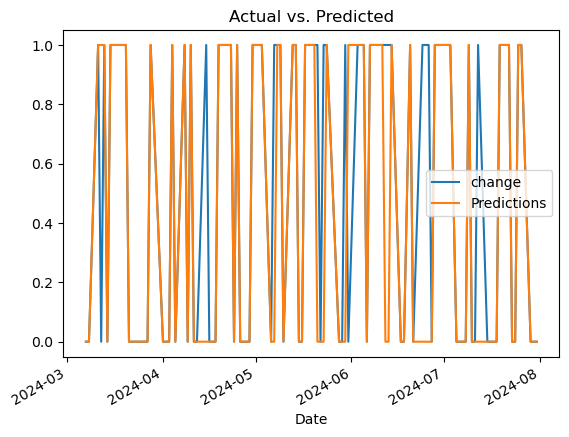

In [21]:
# Combine actual values and predictions
combined = pd.concat([y_test, predictions_df], axis=1)

# Plot the combined DataFrame
combined.plot(title='Actual vs. Predicted')
plt.show()

In [22]:
# Prepare latest data for prediction
latest_data = X_scaled[-1].reshape(1, -1)  # Take the most recent row
latest_data_df = pd.DataFrame(latest_data, columns=X.columns)

In [23]:
# Make prediction for the next day
next_day_prediction = model.predict(latest_data_df).round().flatten()[0]
print(f'Prediction for the next day: {"Stock Will Go Up" if next_day_prediction == 1 else "Stock Will Go Down"}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Prediction for the next day: Stock Will Go Down
